## Springboard Data Science Track Capstone Project 1
### Histopathologic Cancer Detection
### by Morgan Fry
### Data Wrangling notebook


In [73]:
#first include packages for image processing etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.utils import shuffle
import pickle
import sys
import cv2

In [74]:
#load a sample of the data
#load training labels
tr_data=pd.read_csv('train_labels.csv')
print(tr_data.head(8))

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da      1
7  7f6ccae485af121e0b6ee733022e226ee6b0c65f      1


#### Let's plot a few images with and without cancer and do a cursory comparison

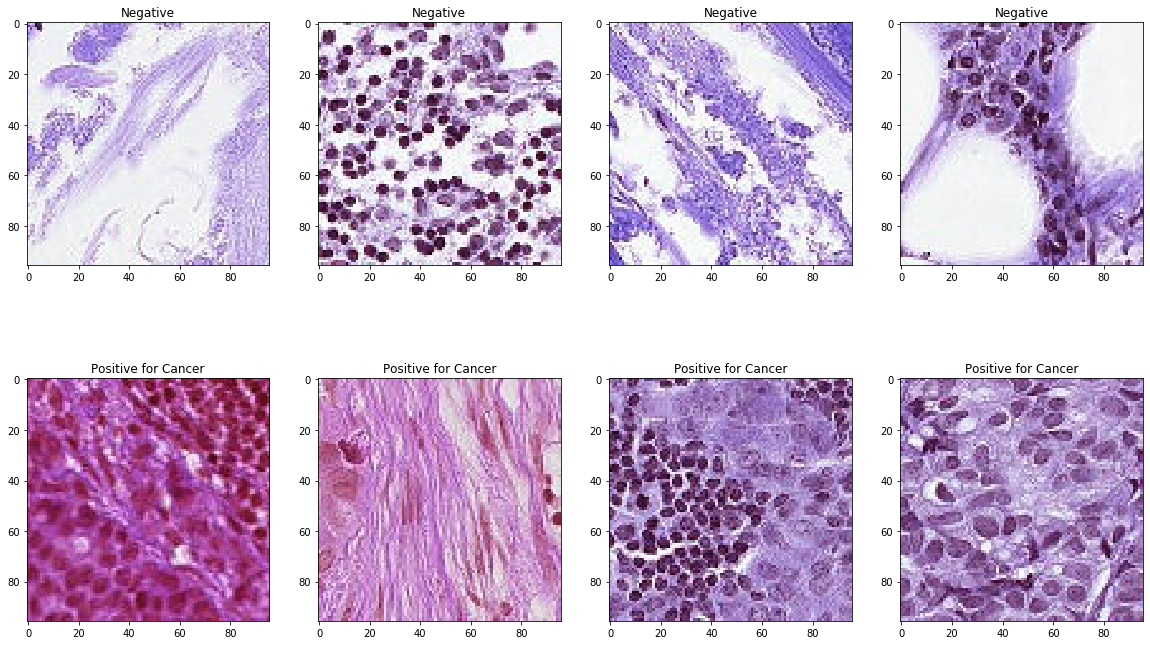

In [75]:
#select 8 at random
shuffled_tr_data=shuffle(tr_data)

fig,ax = plt.subplots(2,4, figsize=(20,12))
#4 negatives
for i, idx in enumerate(shuffled_tr_data[shuffled_tr_data['label'] == 0]['id'][:4]):
    path = 'train/'+idx+'.tif'
    ax[0,i].imshow(cv2.imread(path))
    ax[0,i].set_title('Negative')

#4 positives
for i, idx in enumerate(shuffled_tr_data[shuffled_tr_data['label'] == 1]['id'][:4]):
    path = 'train/'+idx+'.tif'
    ax[1,i].imshow(cv2.imread(path))
    ax[1,i].set_title('Positive for Cancer')


A little further examination and we can see that the images are all 96 pixels square and RGB. This will load simply into numpy arrays.

In [76]:
#load n images into Dictionary
def load_images(n,df):
    """
    Parameters:
        n number ofimages
        df dataframe of id, label columns.
    Returns:
        X,y data and labels:
            X is dictionary of numpy arrays representing images, indexed by id
            y is dataframe of id, label columns; 'id' matches indexes in X
    """
    X={}
    shuffled=shuffle(df)
   # y=pd.DataFrame()
    for idx,row in shuffled.head(n).iterrows():
        path = 'train/'+str(row['id'])+'.tif'
        img=cv2.imread(path)
        X.update({row['id']:img})
    return(X,shuffled[:n])
    

In [77]:
#load entire train set into dictionary. 
def load_all_images(df):
    """
    loads all the images with id's in the dataframe df
    Parameters:
        df dataframe of id, label columns.
    Returns:
        X data:
            X is dictionary of numpy arrays representing images, indexed by id           
    """ 
    X={}
    for idx,row in df.iterrows():
        path = 'train/'+str(row['id'])+'.tif'
        img=cv2.imread(path)
        X.update({row['id']:img})
    return(X)


In [78]:
#vectorize images: make them 1-dimensional arrays
def vectorize_dict(d):
    """
    Parameters:
        d dictionary of numpy arrays to flatten
    Returns:
        d_vect dictionary of same keys as d and 1-dimensional arrays as values
    """
    d_vect={}
    for k,v in d.items():        
        d_vect[k]=v.ravel()
    return(d_vect)

In [79]:
#make images grayscale

def grayscale_dict(d):
    """
    Parameters:
        d dictionary of numpy arrays representing images
    Returns:
        d_vect dictionary of same keys as d and 1-dimensional arrays representing grayscale images
               
    """

    d_gray={}
    for k,v in d.items():
        gray=cv2.cvtColor(v,code=cv2.COLOR_BGR2GRAY)#image to grayscale
        d_gray[k]=gray
    return(d_gray)



In [40]:
#process the data. 
X=load_all_images(tr_data)

KeyboardInterrupt: 

In [225]:
#confirm size of dataset loaded
print('Number of images loaded is: ', len(X))
print('Number of labels loaded is: ', len(tr_data))

Number of images loaded is:  220025
Number of labels loaded is:  220025


In [204]:
X_vext=vectorize_dict(X)

In [205]:
X_gray=grayscale_dict(X)

##### Now that the data are in a format conducive to analysis, we'll save it and continue with exploratory data analysis in another notebook.

In [ ]:
#pickle the data
pickle.dump(tr_data, open("labels_df.p","wb"))
pickle.dump(X, open("images_dict.p","wb"))
pickle.dump(X_vext, open("images_vect_dict.p","wb"))
pickle.dump(X_gray, open("images_gray_dict.p","wb")) 

##### Test with a smaller sample

In [93]:
sample_size=10000

In [94]:
X_s,y_s=load_images(sample_size,tr_data)

In [96]:
X_s_vect=vectorize_dict(X_s)

In [97]:
X_s_gray=grayscale_dict(X_s)

In [98]:
X_s_gray_vect=vectorize_dict(X_s_gray)

In [99]:
#verify size and shape of data
print(len(y_s)," labels")
print(len(X_s), " images")
print(len(X_s_vect), " vectorized images")
print(len(X_s_gray), " grayscale images")
print(len(X_s_gray_vect), " grayscale vectors")
print(list(X_s.values())[0].shape, " shape of gbr images")
print(list(X_s_vect.values())[0].shape, " shape of gbr vectors")
print(list(X_s_gray.values())[0].shape, " shape of grayscale images")
print(list(X_s_gray_vect.values())[0].shape, " shape of grayscale vectors")

10000  labels
10000  images
10000  vectorized images
10000  grayscale images
10000  grayscale vectors
(96, 96, 3)  shape of gbr images
(27648,)  shape of gbr vectors
(96, 96)  shape of grayscale images
(9216,)  shape of grayscale vectors


##### assemble labels with associated vectors into new dataframes for easier processing

In [ ]:
X_s_df=pd.DataFrame.from_dict(X_s_vect,orient='index')

In [100]:
#save the data in pickle files for use in the next folder
pickle.dump(y_s, open("y_s.p","wb"))
pickle.dump(X_s, open("X_s.p","wb"))
pickle.dump(X_s_vect, open("X_s_vect.p","wb"))
pickle.dump(X_s_gray, open("X_s_gray.p","wb")) 
pickle.dump(X_s_gray_vect, open("X_s_gray_vect.p","wb"))